In [4]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.append("/scratch/ql2221/dedalus_sing/Library/Ryan_Plot_Codes")
from isospectrum import isospectrum

from scipy.stats import skew
plt.style.use('/scratch/ql2221/dedalus_sing/Library/Ryan_Plot_Codes/ryan_mplstyle.mplstyle')

In [25]:
nu0 = 0.2
Lx = 48
Ly_instab = 25
Nx = 512

snapname = '2LayQG_channel_sp_%.1f_%d' %(nu0,Nx)
snapname = snapname.replace(".", "d" ); 
diagname = '2LayQG_channel_dg_%.1f_%d' %(nu0,Nx)
diagname = diagname.replace(".", "d" ); 

diagname = '/scratch/ql2221/dedalus_sing/Channel/'+diagname+'/'+diagname+'_s1.h5'
# xi = np.inf

with h5py.File(diagname, mode='r') as file:
#     a_group_key = list(file.keys())
#     print(a_group_key)
    
#     print(file['scales'])
#     print(list(file['scales']))
#     print(file['tasks'])
#     print(list(file['tasks']))
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-1])
    
    KE1 = np.array(file['tasks']['KE1'])
    KE2 = np.array(file['tasks']['KE2'])
    PE1 = np.array(file['tasks']['PE1'])
    PE2 = np.array(file['tasks']['PE2'])

    U1_mean = np.array(file['tasks']['U1_mean'])
    U2_mean = np.array(file['tasks']['U2_mean'])
    
    # dypsi1_t_xavg = np.array(file['tasks']['dypsi1_t_xavg'])
    # dypsi1_b_xavg = np.array(file['tasks']['dypsi1_b_xavg'])
    # dypsi2_t_xavg = np.array(file['tasks']['dypsi2_t_xavg'])
    # dypsi2_b_xavg = np.array(file['tasks']['dypsi2_b_xavg'])
    
    # P0_1_avg = np.array(file['tasks']['P0_1_avg'])
    # P0_2_avg = np.array(file['tasks']['P0_2_avg'])
    
    # tau_psi1 = np.array(file['tasks']['tau_psi1'])
    
#     avgpsi1 = np.array(file['tasks']['avgpsi1'])
#     integpsi1 = np.array(file['tasks']['integpsi1'])

sp_int = np.floor((dg_time_ary[-1]-2)/10)+1
# sp_int = 1
snapname = '/scratch/ql2221/dedalus_sing/Channel/'+snapname+'/'+snapname+'_s%d.h5' %sp_int

1018.2003068494407


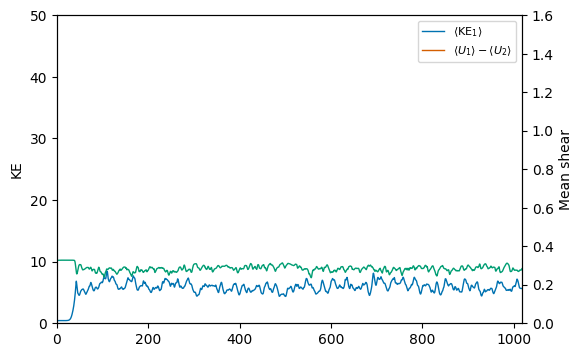

In [27]:
min_x = np.min([dg_time_ary.size,KE1.size])

fig=plt.figure(figsize=(15/2.5, 10/2.5))
ax = fig.add_subplot(111)
ax.plot(dg_time_ary[:min_x],KE1[:min_x,:,:].ravel(), label=r"$\langle{\mathrm{KE}_1}\rangle$")
# ax.plot(dg_time_ary[:min_x],KE2[:min_x,:,:].ravel(), label=r"$\langle{\mathrm{KE}_2}\rangle$")
ax.plot(0,0, label=r"$\langle{U_1}\rangle-\langle{U_2}\rangle$")
# plt.plot(dg_time_ary[:min_x],PE1[:min_x,:,:].ravel())

ax.set_ylim(0,50)
ax.set_ylabel("KE")
# ax.legend()
ax.legend(loc=0)

ax2 = ax.twinx()
ax2.plot(0,0); ax2.plot(0,0)
# ax2.plot(dg_time_ary[:min_x],(U1_mean[:min_x,:,:]-U2_mean[:min_x,:,:]).ravel())
ax2.plot(dg_time_ary[:min_x],(U1_mean[:min_x,:,:]+0*U2_mean[:min_x,:,:]).ravel()/2)
ax2.set_ylim(0,1.6)
ax2.set_ylabel("Mean shear")
# ax2.legend()

# plt.xlim(100,500)

# plt.plot(dg_time_ary[:min_x-1],(KE1[:min_x-1,:,:]-KE1[1:min_x,:,:]).ravel()*-15+25)

figname = 'figs/time_ser'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

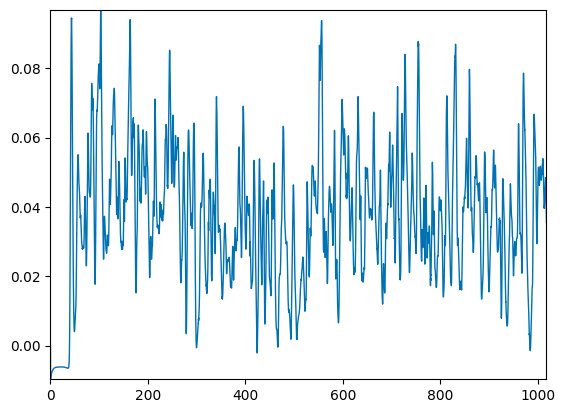

In [28]:
plt.plot(dg_time_ary[:min_x],(U2_mean[:min_x,:,:]).ravel())

In [29]:
KE_slice = KE1[1000:5000,:,:].ravel()
SH_slice = (U1_mean[1000:5000,:,:]-U2_mean[1000:5000,:,:]).ravel()

from scipy import signal
from scipy.fft import fft, fftshift

window = signal.windows.hann(SH_slice.size)

0
0


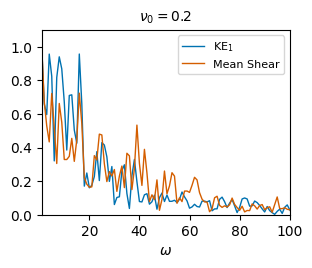

In [30]:
fig=plt.figure(figsize=(8/2.5, 6/2.5))

data = KE_slice

signal = (data-np.mean(data))*window
A = fft(signal) / (len(window)/400)
AA = 1*np.abs(A[1:2000])+1*np.abs(A[-1:2000:-1])
# AA = AA[0:-3]+AA[1:-2]+AA[2:-1]

AA = AA/np.max(AA)
# plt.plot(data)
plt.plot(np.arange(AA.size)+1,(AA),label="$\mathrm{KE}_1$"); # plt.ylim(1e-5,1e2)

print(np.argmax(AA))

#########################
data = SH_slice

signal = (data-np.mean(data))*window
A = fft(signal) / (len(window)/400)
AA = 1*np.abs(A[1:2000])+1*np.abs(A[-1:2000:-1])
# AA = AA[0:-3]+AA[1:-2]+AA[2:-1]

AA = AA/np.max(AA)
# plt.plot(data)
plt.plot(np.arange(AA.size)+1,(AA),label="Mean Shear"); plt.xlim(1,100);# plt.ylim(1e-5,1e2)

# k_ary = np.arange(signal.size)+1
# plt.semilogy(k_ary,1/k_ary**6*1e14); plt.xlim(0,500);# plt.ylim(1e-5,1e2)

print(np.argmax(AA))

plt.xlabel("$\omega$")
plt.legend()
plt.ylim(0,1.1)
plt.title(r"$\nu_0=%.1f$" %nu0)

figname = 'figs/spectra_%.1f' %nu0
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

In [31]:
A.size

4000

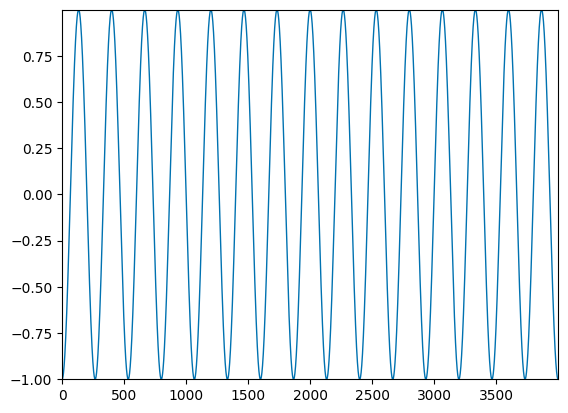

In [32]:
data = np.sin(np.linspace(100,500,4000)/400*2*np.pi*15)

signal = (data-np.mean(data))*window
A = fft(signal) / (len(window)/400)
AA = 1*np.abs(A[1:2000])+1*np.abs(A[-1:2000:-1])

plt.plot(data)
# plt.plot(np.arange(AA.size)+1,np.abs(AA)/200); plt.xlim(1,10);# plt.ylim(1e-5,1e2)

In [33]:
with h5py.File(snapname, mode='r') as file:
    
    P0_1_data = np.squeeze(np.array(file['tasks']['P0_1']))
    P0_2_data = np.squeeze(np.array(file['tasks']['P0_2']))
    
    print(P0_1_data.shape)
    
    q1_data = np.squeeze(np.array(file['tasks']['q1']))
    q2_data = np.squeeze(np.array(file['tasks']['q2']))
    
    zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))
    zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))
    
    h1_data = np.squeeze(np.array(file['tasks']['h1']))
    # h2_data = np.squeeze(np.array(file['tasks']['h2']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])
#     print(diag_time_ary)

(9, 512, 256)
[1009.9989988  1011.00055647 1012.00019156 1012.99884311 1013.99982815
 1015.00004027 1015.99930723 1017.00014332 1018.00009001]


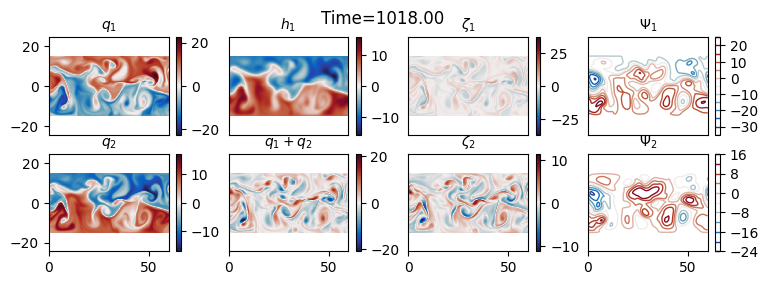

In [37]:
time_idx = -1
L = x[-1]+(x[-1]-x[-2])

# bg_meanQ1 = (xi**(-2)+8)*y*1
# bg_meanQ2 = (xi**(-2)-8)*y*0

# fig=plt.figure(figsize=(15/1.7, 3.6/1.7))
fig=plt.figure(figsize=(16/1.8, 5/1.8))
# fig=plt.figure(figsize=(11, 4))
fig.suptitle('Time=%.2f' %(sim_time_ary[time_idx]), y=0.98)
plt.subplot(2, 4, 1)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
# plt.plot(np.sin(y*0.5/xi)+L/2,y,'k')
# plt.axhline(5)
plt.xticks([]); 

plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1$')

plt.subplot(2, 4, 3)
zmax = np.max(abs(zeta_1_data[time_idx,:,:]))/1
plt.pcolormesh(x,y,zeta_1_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-zmax, vmax=zmax)
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\zeta_1$')
plt.xticks([]); plt.yticks([])

plt.subplot(2, 4, 2)
plt.pcolormesh(x,y,h1_data[time_idx,:,:].T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$h_1$')
plt.xticks([]); plt.yticks([])

plt.subplot(2, 4, 4)
plt.contour(x,y,(P0_1_data[time_idx,:,:]).T, 10, cmap=cmo.balance)
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\Psi_1$')
plt.xticks([]); plt.yticks([])

plt.subplot(2, 4, 5)
plt.pcolormesh(x,y,(q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
# plt.title('$q_1$+mean')
plt.title('$q_2$')

plt.subplot(2, 4, 7)
zmax = np.max(abs(zeta_2_data[time_idx,:,:]))/1
plt.pcolormesh(x,y,zeta_2_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-zmax, vmax=zmax)
plt.axis('equal')
cbar = plt.colorbar();
# plt.contour(x,y,(div_2_data[time_idx,:,:]).T, [-0.003, 0.003], colors='black', norm=colors.CenteredNorm())
plt.title('$\zeta_2$')
plt.yticks([])

# plt.subplot(3, 4, 7)
# plt.pcolormesh(x,y,(div_2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.axis('equal')
# cbar = plt.colorbar();
# plt.title('$\delta_2$')

plt.subplot(2, 4, 8)
plt.contour(x,y,(P0_2_data[time_idx,:,:]).T, 10, cmap=cmo.balance)
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\Psi_2$')
plt.yticks([])

plt.subplot(2, 4, 6)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]+q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1+q_2$')
plt.yticks([])

# plt.subplot(3, 4, 10)
# plt.pcolormesh(x,y,(h1_data[time_idx,:,:]+h2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.axis('equal')
# cbar = plt.colorbar();
# plt.title('$\eta_0$')

# plt.subplot(3, 4, 11)
# plt.hist(q1_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="top, %.2f" %skew(q1_data[:,:,:].ravel()))
# plt.hist(q2_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="bot, %.2f" %skew(q2_data[:,:,:].ravel()))
# legend = plt.legend(title="Loc., Skewness", fontsize=7)

# plt.subplot(3, 4, 12)
# plt.hist(zeta_1_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="top, %.2f" %skew(zeta_1_data[:,:,:].ravel()))
# plt.hist(zeta_2_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="bot, %.2f" %skew(zeta_2_data[:,:,:].ravel()))
# legend = plt.legend(title="Loc., Skewness", fontsize=7)

figname = 'figs/2Lay_snap'
figname = figname.replace(".", "d" ); figname = figname+'.png'
# plt.savefig(figname, bbox_inches='tight', dpi=400)
plt.show()

-0.12627690593123347


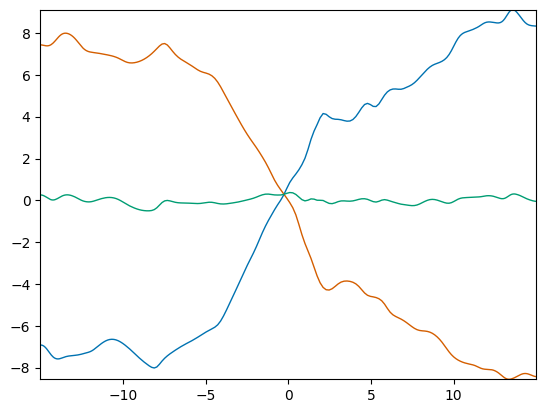

In [38]:
plt.plot(y,np.mean(q1_data[time_idx,:,:],0))
plt.plot(y,np.mean(q2_data[time_idx,:,:],0))
plt.plot(y,np.mean(q1_data[time_idx,:,:]+q2_data[time_idx,:,:],0)/2)

print(np.mean(q2_data[time_idx,:,:]))

# plt.xlim(14,19)

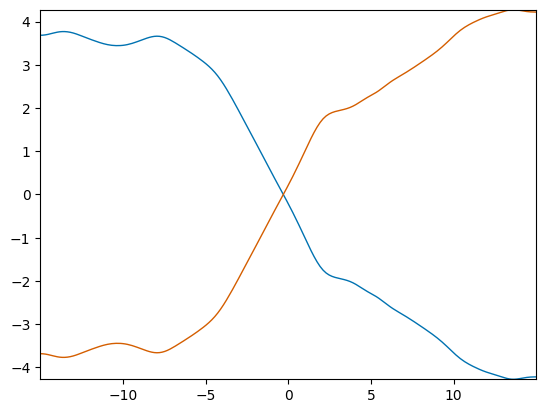

In [39]:
P1_mean = (P0_1_data[time_idx,:,:]+P0_2_data[time_idx,:,:])/2

plt.plot(y,np.mean(P0_1_data[time_idx,:,:]-1*P1_mean,0))
plt.plot(y,np.mean(P0_2_data[time_idx,:,:]-1*P1_mean,0))

# plt.plot(y,np.mean(psi1_data[time_idx,:,:],0)-np.mean(psi2_data[time_idx,:,:],0))

In [40]:
# bg_meanQ1 = (xi**(-2)+8)*y*0
# bg_meanQ2 = (xi**(-2)-8)*y*0

# zmeanQ1 = np.mean(q1_data[time_idx,:,:],axis=0)+bg_meanQ1
# zmeanQ2 = np.mean(q2_data[time_idx,:,:],axis=0)+bg_meanQ2

# plt.figure(figsize=(5, 3))
# plt.plot(y,zmeanQ1)
# # plt.plot(y,zmeanQ2)
# plt.plot(y,np.sin(y*0.5/xi+6)*12,'k')
# plt.xlabel('$x$'); plt.ylabel('$\overline{q_1}$')
# plt.title('Time=%.2f' %(sim_time_ary[time_idx]))

# figname = 'figs/2Lay_q1zonalmean_t%.2f' %sim_time_ary[time_idx]
# figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# # plt.savefig(figname, bbox_inches='tight')

In [9]:
# # Numerics Parameters
# # L = x[-1]+(x[-1]-x[-2])
# Lx, Ly = L, L
# Nx, Ny = psi1_data.shape[2], psi1_data.shape[2]

# dealias = 3/2
# dtype = np.float64

# # Bases
# coords = d3.CartesianCoordinates('x', 'y')
# dist = d3.Distributor(coords, dtype=dtype)
# xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
# ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(0, Ly), dealias=dealias)

# # Fields
# q1 = dist.Field(name='q1', bases=(xbasis,ybasis))

# time_idx = 0
# q1['g'] = q1_data[time_idx,:,:]

# q1_mag2d = q1['c']*np.conj(q1['c'])
# q1_spec = isospectrum(q1_mag2d)

# ######
# KK = xbasis.wavenumbers[2:-1:2]

# # plt.figure(figsize=(5, 3))
# # plt.pcolormesh(q1_mag2d)
# # plt.show()

# plt.figure(1,figsize=(5, 3))

# plt.loglog(KK,q1_spec[1:],label="%.1f" %sim_time_ary[time_idx])

# plt.loglog(KK,KK**-1*3e3,'--',color='k')
# plt.axvline(KK[-1],color='k')
# plt.axvline(0.634*np.sqrt(8),linestyle='-.',color='k')
# # plt.axvline(0.5/xi,color='k')

# # plt.ylim([1e-6,1e2])
# plt.ylim([1e-10,1e3])
# plt.title('$q_1$ Enstrophy spectrum')
# plt.xlabel('$k$')

# plt.legend(['_nolegend_', 'Second line'])

# plt.show()

# figname = 'figs/2Lay_q1spec_t%.2f' %sim_time_ary[time_idx]
# figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# # plt.savefig(figname, bbox_inches='tight')

In [10]:
# with h5py.File(diagname, mode='r') as file:
    
#     KE1_data = np.squeeze(np.array(file['tasks']['KE1']))
#     KE2_data = np.squeeze(np.array(file['tasks']['KE2']))
# #     print(KE1_data.shape)
#     diag_time_ary = np.array(file['scales']['sim_time'])

# plt.figure(figsize=(5, 3))

# lim = min(diag_time_ary.shape[0],KE1_data.shape[0])
# # plt.semilogy(diag_time_ary[:lim],KE1_data[:lim])
# # plt.semilogy(diag_time_ary[:lim],KE2_data[:lim])
# plt.plot(diag_time_ary[:lim],KE1_data[:lim])
# plt.plot(diag_time_ary[:lim],KE2_data[:lim])

# plt.show()

# figname = 'figs/2Lay_KEhist_t%.2f' %sim_time_ary[time_idx]
# figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# # plt.savefig(figname, bbox_inches='tight')